# Proyecto 2 

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-02-26

**Fecha de actualización:** 2022-02-27

# Morosidad de clientes.
En este proyecto se aplicarán técnicas de aprendizaje automático, tanto supervisado como no supervisado, para predecir y analizar la morosidad de clientes.

El conjunto de datos está basada en los datos reales de una empresa proveedora de servicio de Internet.
Los datos han sido previamente anonimizados y escalados, con el fin de preservar la identidad de clientes, así como proteger la información sensible.

Diccionario del conjunto de datos.
<table>
    <tr>
        <td>
            <b>invoice_id</b>
        </td>
        <td>
            Identificador del número de factura.(Múltiples ítems pueden pertenecer a la misma factura).
        </td>
    </tr>
    <tr>
        <td>
            <b>service_contract_id</b>
        </td>
        <td>
            Identificador del número de contrato.
        </td>
    </tr>
    <tr>
        <td>
            <b>neighborhood</b>
        </td>
        <td>
            Sector en el que se ha instalado el servicio.
        </td>
    </tr>
    <tr>
        <td>
            <b>contract_days</b>
        </td>
        <td>
            Días transcurridos desde la fecha de contratación hasta la fecha de pago.
        </td>
    </tr>
    <tr>
        <td>
            <b>days_past_due</b>
        </td>
        <td>
            Días de retraso o anticipo en el pago <em>( 0< days_past_due >= 0 )</em>. Si <em>days_past_due</em> es negativo, significa que el pago se anticipó <em>|days_past_due|</em> días, caso contrario si es positivo, el pago se retrasó en <em>days_past_due</em>.
        </td>
    </tr>
    <tr>
        <td>
            <b>access_type</b>
        </td>
        <td>
            Tipo de acceso.
        </td>
    </tr>
    <tr>
        <td>
            <b>contract_plan</b>
        </td>
        <td>
            Tipo de contrato, corresponde al plan contratado por el cliente.
        </td>
    </tr>
    <tr>
        <td>
            <b>lat</b>
        </td>
        <td>
            Latitud de la instalación
        </td>
    </tr>
    <tr>
        <td>
            <b>lng</b>
        </td>
        <td>
            Longitud de la instalación
        </td>
    </tr>
    <tr>
        <td>
            <b>emision_date</b>
        </td>
        <td>
            Fecha de emisión de la factura
        </td>
    </tr>
    <tr>
        <td>
            <b>total_factura</b>
        </td>
        <td>
            Valor total de la factura a la cual pertenece el <em>item</em>. Pueden existir varios registros con el mismo numero de factura.
        </td>
    </tr>
    <tr>
        <td>
            <b>item_price</b>
        </td>
        <td>
            Valor del item facturado
        </td>
    </tr>
    <tr>
        <td>
            <b>incident_type</b>
        </td>
        <td>
            Tipo de incidente, NULL si el cliente no ha reportado un incidente  dentro del periodo (mes).
        </td>
    </tr>
    <tr>
        <td>
            <b>incident_count</b>
        </td>
        <td>
            Cantidad de veces que el cliente ha reportado un incidente dentro del periodo (mes).
        </td>
    </tr>
</table>

<b>Nota:</b> <em>trabajo en proceso, el diccionario de datos podría variar en función de nuevos requerimientos o descubrimiento de nuevas características que se consideren relevantes.</em>


In [1]:
import pandas as pd
import numpy as np


import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
filename = 'data/morosidad.csv'
originalData = pd.read_csv(filename)
originalData.head()

,invoice_id,service_contract_id,neighborhood,contract_days,days_past_due,access_type,contract_plan,lat,lng,emision_date,total_factura,item_price,incident_type,incident_count
0,999850,99996835,23,1385,-5,0,47,-1.548273,-6.299125,2015-06-05 12:30:45,949.4,949.4,NaN,NaN
1,999263,99996835,23,1420,0,0,47,-1.548273,-6.299125,2015-07-10 16:17:06,949.4,949.4,NaN,NaN
2,998765,99996835,23,1452,1,0,47,-1.548273,-6.299125,2015-08-11 16:21:02,949.4,949.4,NaN,NaN
3,998341,99996835,23,1482,0,0,47,-1.548273,-6.299125,2015-09-10 12:44:35,949.4,949.4,NaN,NaN
4,997776,99996835,23,1514,2,0,47,-1.548273,-6.299125,2015-10-12 10:55:37,949.4,949.4,NaN,NaN


In [3]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100173 entries, 0 to 100172
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   invoice_id           100173 non-null  int64  
 1   service_contract_id  100173 non-null  int64  
 2   neighborhood         100173 non-null  int64  
 3   contract_days        100173 non-null  int64  
 4   days_past_due        100173 non-null  int64  
 5   access_type          100173 non-null  int64  
 6   contract_plan        100173 non-null  int64  
 7   lat                  97407 non-null   float64
 8   lng                  97401 non-null   float64
 9   emision_date         100173 non-null  object 
 10  total_factura        100173 non-null  float64
 11  item_price           100173 non-null  float64
 12  incident_type        9326 non-null    float64
 13  incident_count       9326 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 10.7+ MB


In [4]:
data=originalData.copy()

#data.drop(columns=['service_contract_id'], inplace=True)

#Los campos indicent_type e incident_count son nulos cuando un cliente no ha reportado un incidente en el periodo
data['incident_type']=data['incident_type'].fillna(0)
data['incident_count']=data['incident_count'].fillna(0)
data['lat']=data['lat'].fillna(data['lat'].mean())
data['lng']=data['lng'].fillna(data['lng'].mean())
data['days_past_due']=data['days_past_due'].fillna(data['days_past_due'].mean())


# Se crea el objeto data2 para mantener el original sin modificaciones
data['year'] = data['emision_date'].apply(lambda x: int(x[0:4]))
data['month'] = data['emision_date'].apply(lambda x: int(x[5:7]))
data['day'] = data['emision_date'].apply(lambda x: int(x[8:10]))
data['hour'] = data['emision_date'].apply(lambda x: int(x[11:13]))
data['minute'] = data['emision_date'].apply(lambda x: int(x[14:16]))


data['emision_date']= data['emision_date'].astype('datetime64')

data['week_day'] = data['emision_date'].dt.dayofweek


#data.drop(columns=['emision_date'], inplace=True)
data.head()


# Temporalmente eliminado, buscar estrategia para mantener el los datos nulos del 
# número de factura, los nulos corresponden con los items pendientes de pago
data.dropna(inplace=True)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100173 entries, 0 to 100172
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice_id           100173 non-null  int64         
 1   service_contract_id  100173 non-null  int64         
 2   neighborhood         100173 non-null  int64         
 3   contract_days        100173 non-null  int64         
 4   days_past_due        100173 non-null  int64         
 5   access_type          100173 non-null  int64         
 6   contract_plan        100173 non-null  int64         
 7   lat                  100173 non-null  float64       
 8   lng                  100173 non-null  float64       
 9   emision_date         100173 non-null  datetime64[ns]
 10  total_factura        100173 non-null  float64       
 11  item_price           100173 non-null  float64       
 12  incident_type        100173 non-null  float64       
 13  incident_count

In [5]:
data.corr()

,invoice_id,service_contract_id,neighborhood,contract_days,days_past_due,access_type,contract_plan,lat,lng,total_factura,item_price,incident_type,incident_count,year,month,day,hour,minute,week_day
invoice_id,1.000000,0.584101,0.024210,-0.055794,-0.193471,-0.360094,-0.319567,0.014839,-0.011667,-0.067265,-0.003538,-0.029595,-0.005278,-0.910917,-0.004567,-0.063995,0.035073,-0.009114,0.021957
service_contract_id,0.584101,1.000000,-0.001779,0.612091,-0.074560,-0.252656,-0.555159,0.033723,-0.024790,-0.125747,0.030159,-0.029556,-0.013417,-0.547375,-0.007142,-0.014473,0.010031,-0.008475,0.029228
neighborhood,0.024210,-0.001779,1.000000,-0.004923,-0.042697,-0.017796,-0.024355,0.028504,0.003859,-0.015761,0.008761,0.007562,0.010344,-0.030675,0.000223,-0.017151,0.019746,0.002085,-0.016027
contract_days,-0.055794,0.612091,-0.004923,1.000000,0.022328,0.002904,-0.292472,0.007899,-0.008148,-0.095801,0.009799,-0.008734,-0.010643,0.067670,-0.007892,0.032549,-0.017352,-0.000241,0.023918
days_past_due,-0.193471,-0.074560,-0.042697,0.022328,1.000000,0.093769,0.073431,-0.006582,0.004942,0.086411,0.027808,-0.020055,-0.031381,0.187302,0.021393,0.254379,0.059834,0.015086,-0.026296
access_type,-0.360094,-0.252656,-0.017796,0.002904,0.093769,1.000000,0.268248,-0.018736,0.010745,0.030669,-0.000924,0.051348,0.035389,0.424344,-0.025997,0.027222,0.009083,0.005615,-0.029265
contract_plan,-0.319567,-0.555159,-0.024355,-0.292472,0.073431,0.268248,1.000000,-0.038399,0.015084,0.120121,0.084324,0.039867,0.032226,0.289604,-0.002260,0.015116,0.019861,0.002930,-0.028745
lat,0.014839,0.033723,0.028504,0.007899,-0.006582,-0.018736,-0.038399,1.000000,-0.684906,-0.015976,0.006252,-0.001282,-0.000911,-0.009886,0.001281,-0.001855,-0.007870,0.001444,-0.004866
lng,-0.011667,-0.024790,0.003859,-0.008148,0.004942,0.010745,0.015084,-0.684906,1.000000,0.010954,-0.003860,0.000758,-0.000855,0.008395,0.002577,-0.000091,0.000900,-0.001686,0.002114
total_factura,-0.067265,-0.125747,-0.015761,-0.095801,0.086411,0.030669,0.120121,-0.015976,0.010954,1.000000,0.167512,-0.003497,-0.012702,0.057464,0.019845,0.052338,0.020051,0.000278,-0.013596


## Análisis Exploratorio
En esta sección se explora y analizan los datos para obtener información que permita entender de forma general el conjunto de datos y permita generar gráficos representativos.

### Promedio de días de mora por año y mes

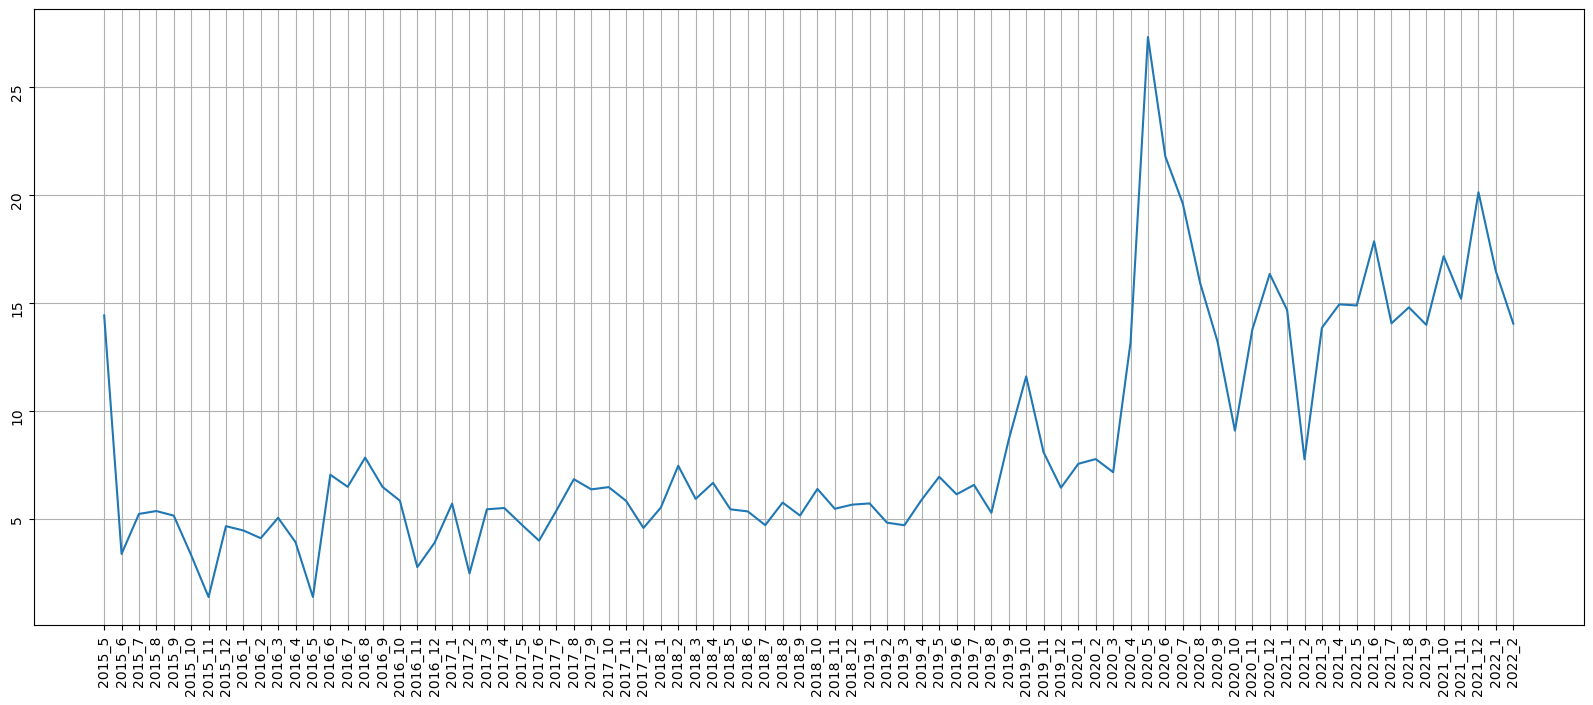

In [6]:
meanPastDue = data.groupby(['year','month'])['days_past_due'].mean().reset_index().sort_values(['year','month'])
meanPastDue['period'] = meanPastDue['year'].map(str) + '_'+meanPastDue['month'].map(str)
meanPastDue.index = meanPastDue['period']
meanPastDue = meanPastDue.drop(columns=['year','month','period'])

fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.plot(meanPastDue['days_past_due'])
ax.tick_params(labelrotation=90)
ax.grid();


En la figura anterior se puede observar que el promedio de días de mora para cada periodo(Año-mes). En promedio los pagos se realizan con 5 días de mora desde 2015-05(mayo de 2015) hasta 2019-10(octubre de 2019) donde se evidencia un incremento significativo en la morosidad(alerta de COVID19 en China); sin embargo, a partir del mes periodo 2020-04(fecha cercana las restricciones locales por el virus COVID) la morosidad se incrementa drásticamente. Llega a su pico más alto en el periodo 2020-05(mayo de 2020) y se reduce en los meses posteriores. No obstante, los niveles de morosidad se mantienen en los 15 días aproximadamente, frente a los 5 días de mora de los primeros periodos.

### Distribución espacial del promedio de morosidad por cliente.

El siguiente gráfico de nube de puntos representa, mediante una escala de color, el promedio de mora por cliente.

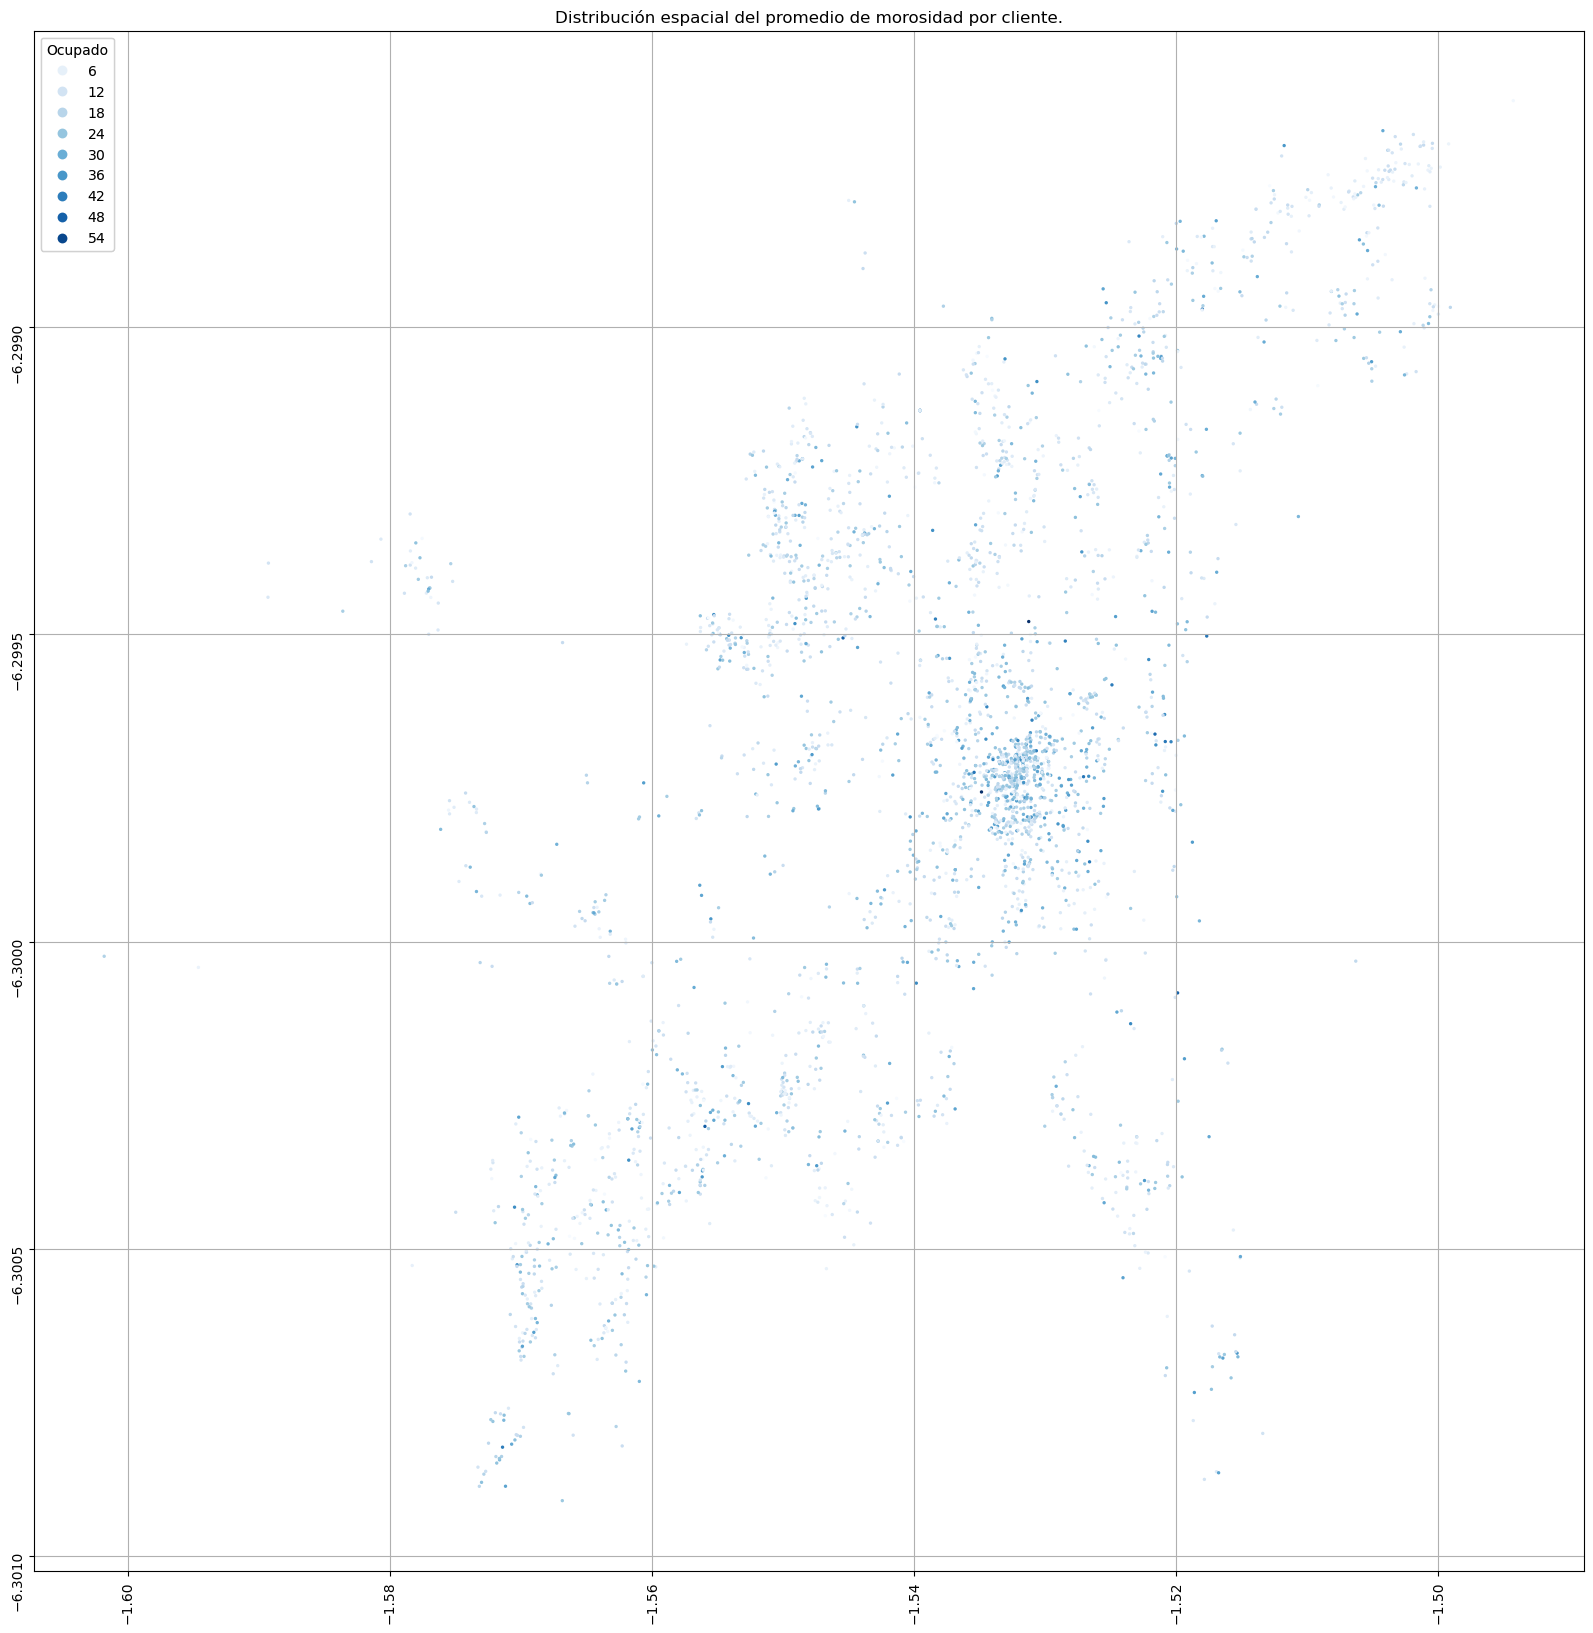

In [7]:
#meanPastDue = data.groupby(['year','month'])['days_past_due'].mean().reset_index().sort_values(['year','month'])
#meanPastDue['period'] = meanPastDue['year'].map(str) + '_'+meanPastDue['month'].map(str)
#meanPastDue.index = meanPastDue['period']
#meanPastDue = meanPastDue.drop(columns=['year','month','period'])

data2 = data[(data['lat']>-5) & (data['lat']<-1.2) & (data['lng']<-6.297) & (data['days_past_due']<60)& (data['days_past_due']>0)]
data2=data2.groupby(['service_contract_id'])[['days_past_due','lat','lng']].mean().reset_index()

fig, ax = plt.subplots(1,1,figsize=(20,20))
scatter = ax.scatter(data2['lat'],data2['lng'],c=data2['days_past_due'], s=2, cmap='Blues')
ax.tick_params(labelrotation=90)
ax.grid()
ax.set_title('Distribución espacial del promedio de morosidad por cliente.')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Ocupado")
ax.add_artist(legend1);



### Días y horas de mayor recaudación
En esta sección se analizan los días de la semana y los horas de mayor recaudación.

#### a. Días de mayor recaudación

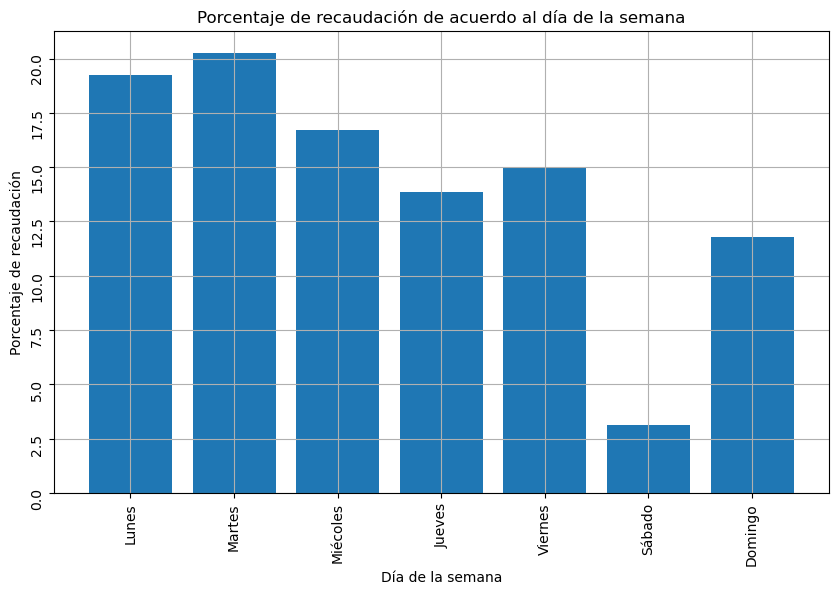

In [22]:
dateFilter = (data['year']>=2021) & (data['year']<2025)

meanPastDue = data[dateFilter].groupby(['week_day']).count().reset_index().sort_values(['week_day'])
meanPastDue.index = meanPastDue['week_day'].replace({0:'Lunes',1:'Martes',2:'Miécoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo',})
meanPastDue = meanPastDue.drop(columns=['week_day'])

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.bar(x=meanPastDue['days_past_due'].index, height=meanPastDue['days_past_due']/len(data[dateFilter])*100)
ax.tick_params(labelrotation=90)
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Porcentaje de recaudación')
ax.set_title('Porcentaje de recaudación de acuerdo al día de la semana')
ax.grid();

#### b. Horas de mayor recaudación.

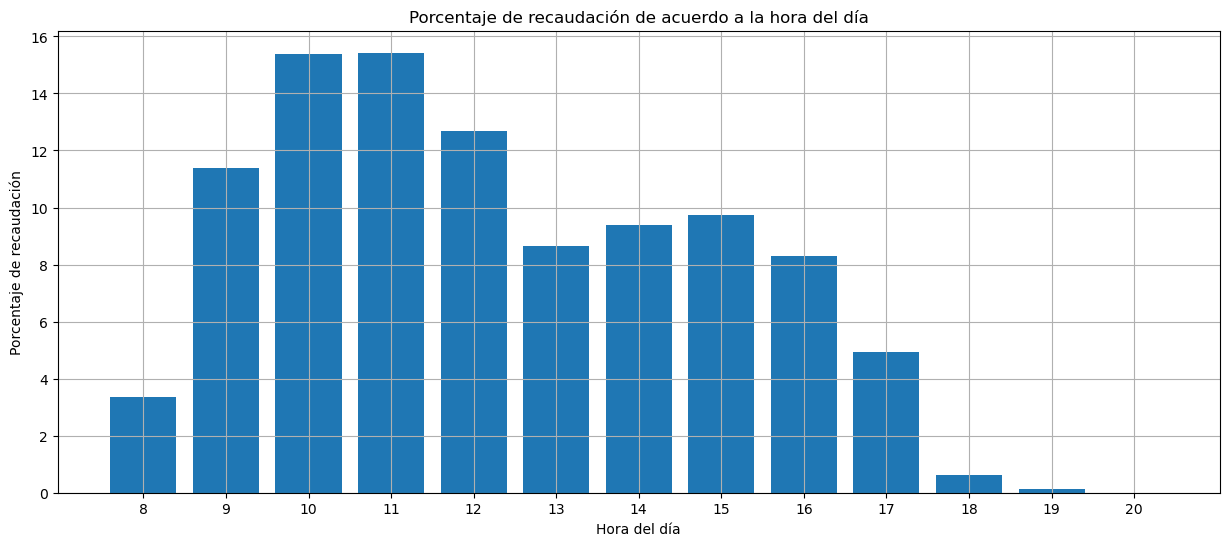

In [25]:
dateFilter = (data['year']>=2021) & (data['year']<2025)

meanPastDue = data[dateFilter].groupby(['hour']).count().reset_index().sort_values(['hour'])
meanPastDue.index = meanPastDue['hour'].map(str)
meanPastDue = meanPastDue.drop(columns=['hour'])

fig, ax = plt.subplots(1,1,figsize=(15,6))
ax.bar(x=meanPastDue['days_past_due'].index, height=meanPastDue['days_past_due']/len(data[dateFilter])*100)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Porcentaje de recaudación')
ax.set_title('Porcentaje de recaudación de acuerdo a la hora del día')
ax.grid();

,days_past_due
emision_date,
2000-01-01 08:00:00,4
2000-01-01 08:15:00,152
2000-01-01 08:30:00,538
2000-01-01 08:45:00,588
2000-01-01 09:00:00,870


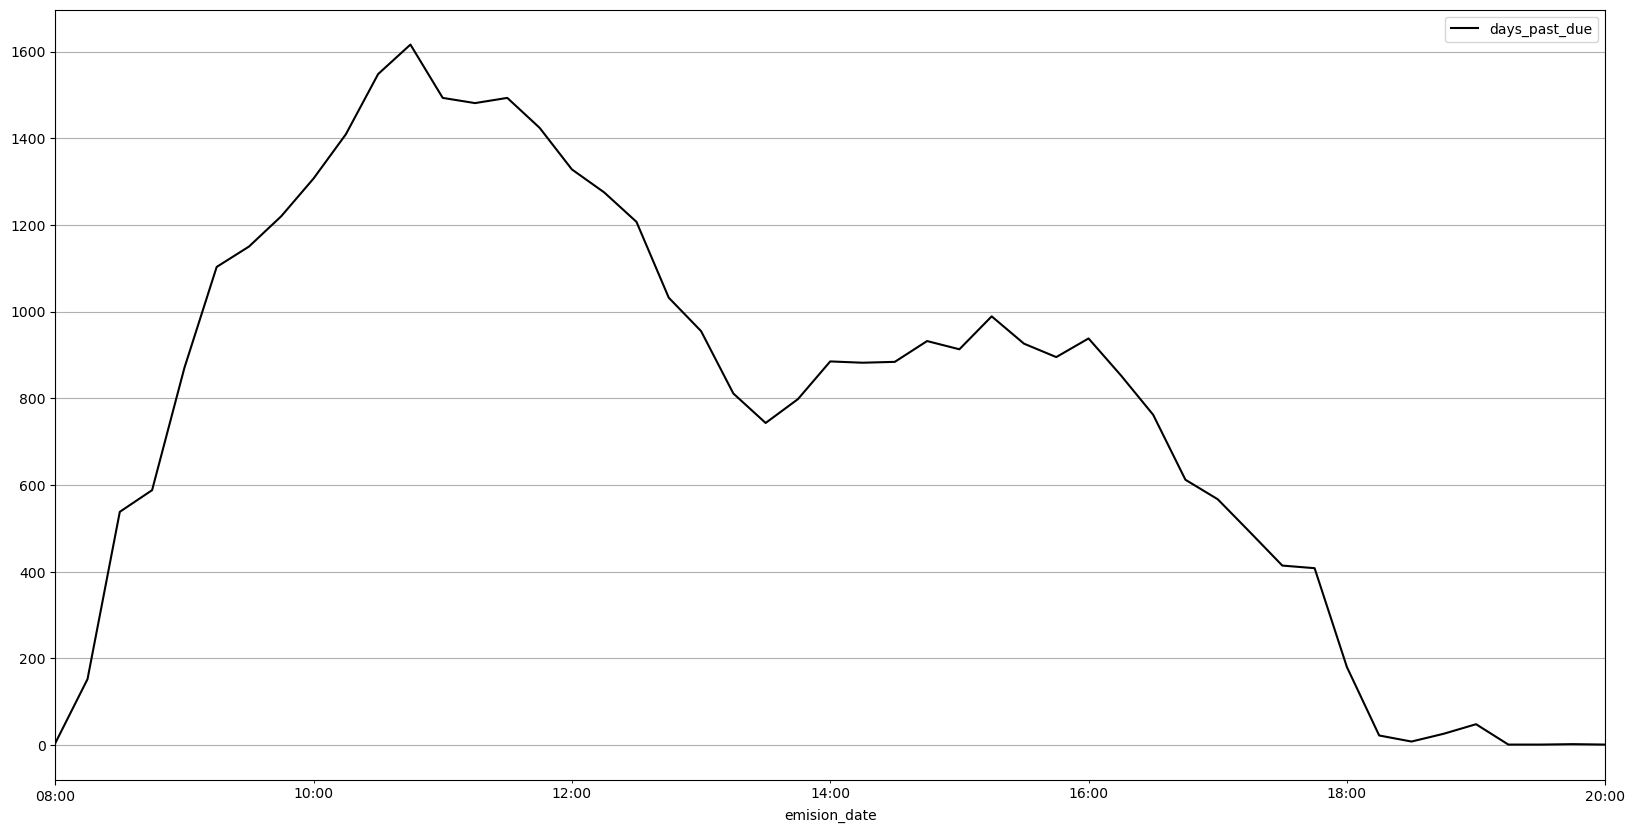

In [10]:
paymentTime = data.copy()
dateFilter  = (paymentTime['emision_date'].dt.year >= 2021) & (paymentTime['emision_date'].dt.year < 2025)
paymentTime = paymentTime[dateFilter]

paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(year = 2000))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(month = 1))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(day = 1))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(minute = (x.minute // 15)*15  ))
paymentTime['emision_date'] = paymentTime['emision_date'].apply(lambda x: x.replace(second = 0))

paymentTime = paymentTime.groupby(['emision_date'])['days_past_due'].count().reset_index().sort_values(['emision_date'])
paymentTime.index = paymentTime['emision_date']
paymentTime.drop(columns=['emision_date'], inplace=True)
paymentTime.plot(style='k',figsize=(20,10),grid=True)
#plt.grid(which='both')
paymentTime.head()

### Días de mora promedio por sector

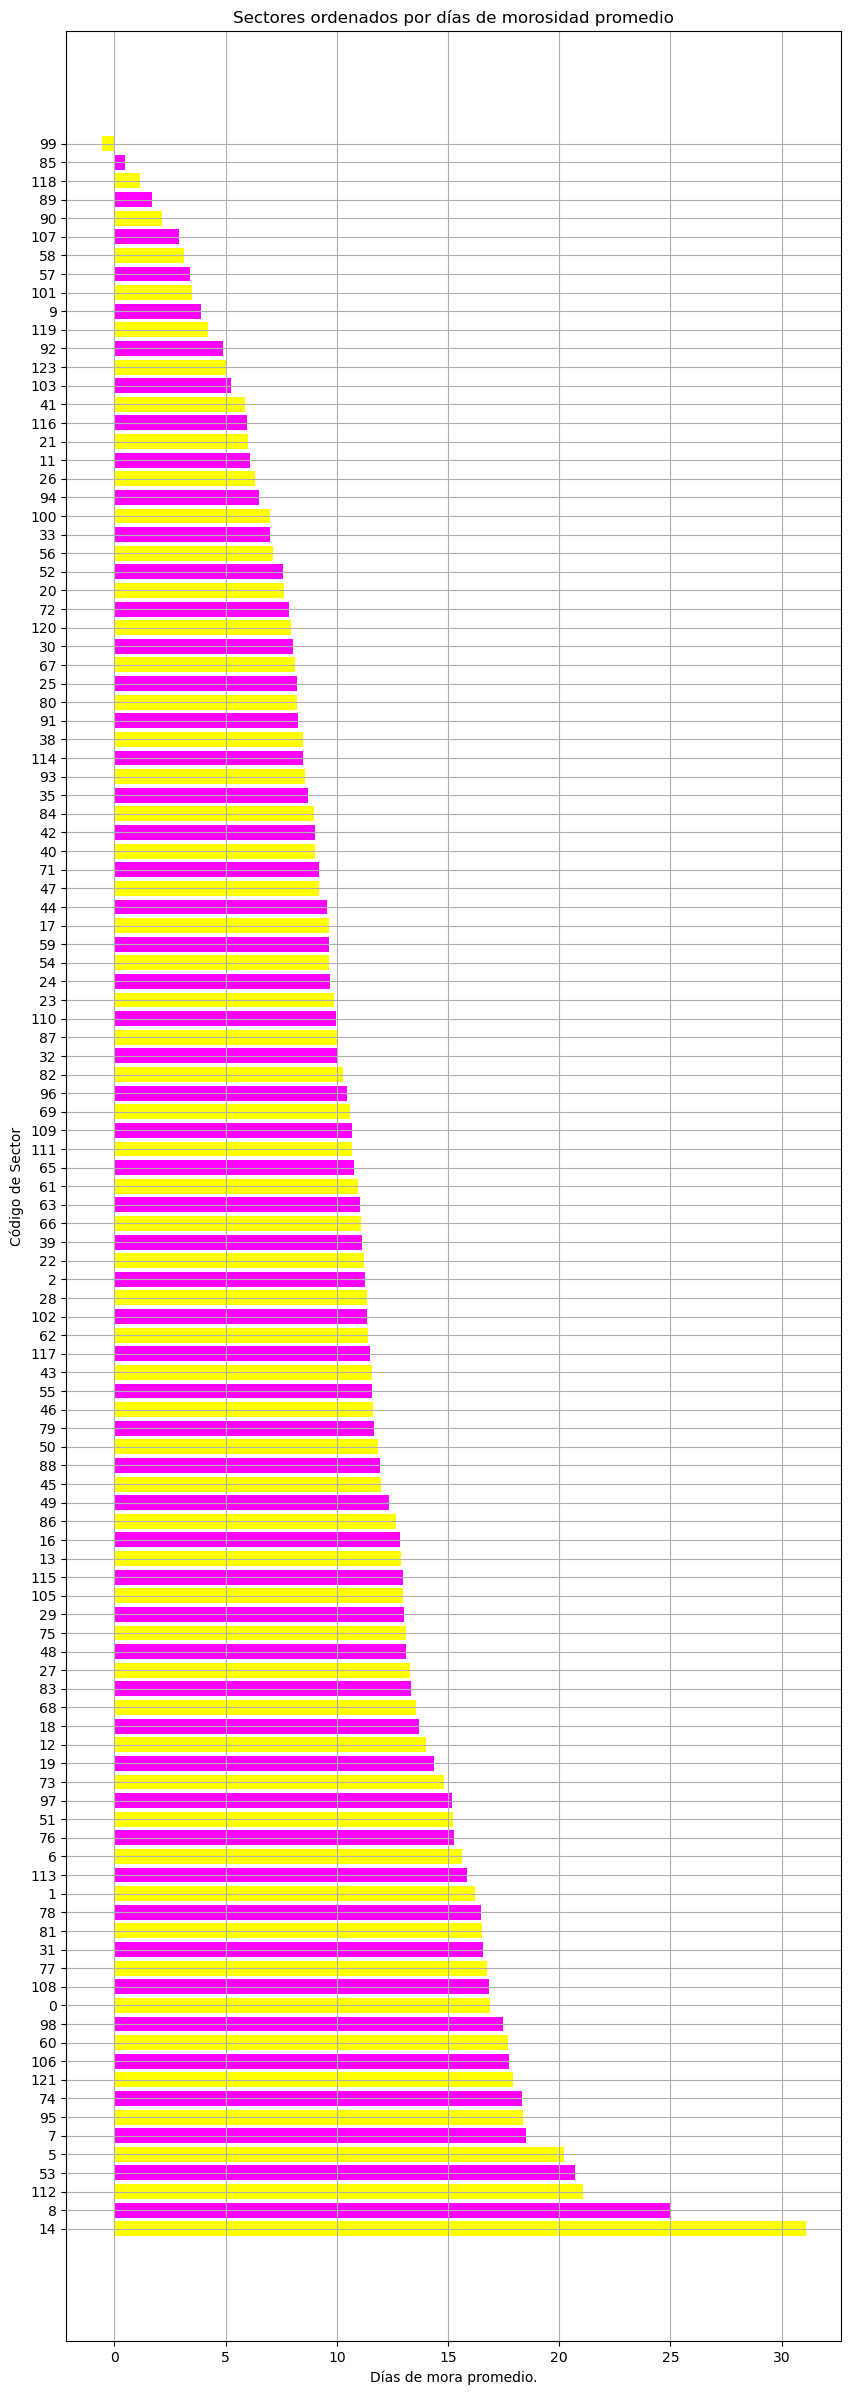

In [26]:
neighborhoodStats = data[data['year']>=2020].groupby('neighborhood').count()[['invoice_id']].join(data.groupby('neighborhood').mean()['days_past_due'], on='neighborhood')
neighborhoodStats.rename(columns={'invoice_id':'count', 'days_past_due':'mean_days_past_due'}, inplace=True)

neighborhoodStats = data.groupby('neighborhood')['days_past_due'].mean().reset_index().sort_values('days_past_due', ascending=False)
fig, ax = plt.subplots(1,1,figsize=(10,30))
ax.barh(neighborhoodStats['neighborhood'].map(str),neighborhoodStats['days_past_due'],color=['#FF0','#F0F'])
ax.set_xlabel('Días de mora promedio.')
ax.set_ylabel('Código de Sector')
ax.set_title('Sectores ordenados por días de morosidad promedio')
ax.grid();

## Definición de métricas.
Se aborda el problema desde tres puntos de vista:
1. Ténicas de regresión:
    * Predecir los días de mora de un cliente.
        * Las métricas que se utilizarán para evaluar los modelos serán: $R^2$, $MAE$ y $RMSE$, con especial énfasis en $R^2$.
2. Técnicas de clasificación:
    * Clasificar a un cliente como moroso o no moroso, para lo cual se definirá un umbral de corte(moroso no moroso). Posteriormente se entrenará el modelo en este conjunto de datos transformado.
        * Las métricas que se utilizarán serán: Accuracy, Precision, Recall y F1-Score, con especial énfasis en F1-Score. 
3. Agrupamiento de clientes.
    * Utilizar modelos de agrupamiento(clustering) para segmentar a los clientes.
        * El Coeficiente de la silueta será la métrica a utilizar para determinar el agrupamiento más adecauado.
